In [1]:
## ML models applied to WPBC
## Highest accuracy got is 87.87 got by LGBM


## Importing Libraries

In [1]:
import numpy as np #used in code line 6
import pandas as pd 
import matplotlib.pyplot as plt #used in PCA line 81 

%matplotlib inline

## Reading the file

In [2]:
df=pd.read_csv("C:/Users/sarav/Videos/SARAVANAN/3rd 2/TARP/wpbc.data.csv")
#https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(Prognostic)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   Recurrence               198 non-null    object 
 2   Time                     198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

## Cleaning dataset

In [4]:
df['Lymph node status'].unique()

array(['5.1', '2', '0', '?', '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '5', '24', '18', '16', '21'],
      dtype=object)

In [5]:
df['Lymph node status']=df['Lymph node status'].apply(lambda x: np.nan if x == '?' else x) 

In [6]:
df['Lymph node status']=df['Lymph node status'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   Recurrence               198 non-null    object 
 2   Time                     198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [8]:
df['Lymph node status']=df['Lymph node status'].fillna(df['Lymph node status'].mean())

In [9]:
X=df.iloc[:,2:35]

In [10]:
X

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.100000
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.000000
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.000000
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.000000
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.000000
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.000000
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.000000
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.211856


In [11]:
y=df['Recurrence']

## Removing correlated columns

In [12]:
# Build a Dataframe with Correlation between Features
corr_matrix = X.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()


,feature1,feature2,Correlation
0,perimeter_mean,radius_mean,0.995933
1,radius_mean,perimeter_mean,0.995933
2,radius_mean,area_mean,0.992855
3,area_mean,radius_mean,0.992855
4,area_mean,perimeter_mean,0.990699


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 8 correlated feature groups
out of 33 total features.


In [15]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

          feature1         feature2  Correlation
0   perimeter_mean      radius_mean     0.995933
5   perimeter_mean        area_mean     0.990699
24  perimeter_mean  perimeter_worst     0.923659
26  perimeter_mean     radius_worst     0.921552
36  perimeter_mean       area_worst     0.889344


     feature1      feature2  Correlation
12  radius_se  perimeter_se     0.973267
14  radius_se       area_se     0.956929


          feature1             feature2  Correlation
32  concavity_mean  concave points_mean     0.909990
47  concavity_mean     compactness_mean     0.836015


         feature1      feature2  Correlation
38  texture_worst  texture_mean      0.86205


             feature1                 feature2  Correlation
40  compactness_worst  fractal_dimension_worst     0.847403
48  compactness_worst          concavity_worst     0.835064


                feature1        feature2  Correlation
42  fractal_dimension_se  compactness_se     0.845176


                  feature1        

In [16]:
df.drop("perimeter_mean",axis=1,inplace=True)
df.drop("area_mean",axis=1,inplace=True)
df.drop("radius_worst",axis=1,inplace=True)
df.drop("perimeter_worst",axis=1,inplace=True)
df.drop("area_worst",axis=1,inplace=True)

In [17]:
df.drop("radius_se",axis=1,inplace=True)
df.drop("area_se",axis=1,inplace=True)

In [18]:
df.drop("concavity_mean",axis=1,inplace=True)
df.drop("texture_worst",axis=1,inplace=True)
df.drop("fractal_dimension_worst",axis=1,inplace=True)
df.drop("concavity_worst",axis=1,inplace=True)


In [19]:
df.drop("compactness_se",axis=1,inplace=True)



In [20]:
df

,id,Recurrence,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concave points_worst,symmetry_worst,Tumor Size,Lymph node status
0,119513,N,31,18.02,27.60,0.09489,0.10360,0.07055,0.1865,0.06333,...,0.03233,0.009854,0.01694,0.003495,0.11950,0.1926,0.11700,0.2677,5.0,5.100000
1,8423,N,61,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,...,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.26540,0.4601,3.0,2.000000
2,842517,N,116,21.37,17.44,0.08836,0.11890,0.08180,0.2333,0.06010,...,0.03300,0.018050,0.03094,0.005039,0.11880,0.3449,0.20320,0.4334,2.5,0.000000
3,843483,N,123,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,...,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.25750,0.6638,2.0,0.000000
4,843584,R,27,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,...,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.16250,0.2364,3.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,0.07592,0.09162,0.06367,0.1728,0.05262,...,0.02433,0.020360,0.02486,0.003922,0.08191,0.1319,0.09378,0.2061,6.0,2.000000
194,943471,N,8,15.44,31.18,0.09399,0.10620,0.06500,0.1735,0.06105,...,0.02834,0.010790,0.02122,0.003168,0.12720,0.2362,0.12860,0.2914,1.5,0.000000
195,94547,N,12,17.17,29.19,0.08952,0.06655,0.05068,0.1793,0.05392,...,0.03155,0.009714,0.02734,0.001377,0.12610,0.1572,0.09520,0.3362,3.7,0.000000
196,947204,R,3,21.42,22.84,0.10700,0.19390,0.13180,0.1884,0.06472,...,0.04948,0.017700,0.01481,0.003979,0.14980,0.4379,0.22150,0.2832,3.0,3.211856


<AxesSubplot:xlabel='Recurrence'>

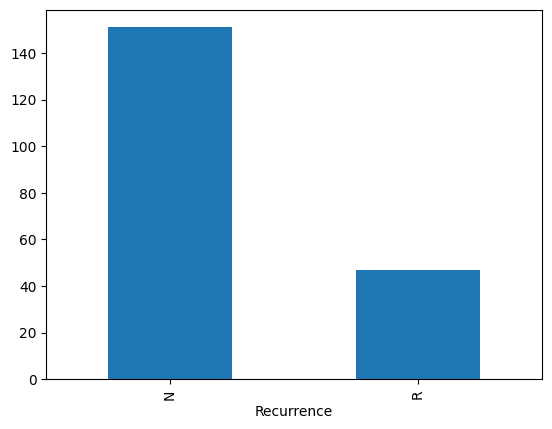

In [21]:
(df.groupby('Recurrence')
   ['id'].nunique()
   .plot.bar()
)

In [22]:
df.to_csv('tarp.csv')

## Normalizing skewed columns

In [23]:
df.skew(axis = 0)

C:\Users\sarav\AppData\Local\Temp\ipykernel_14400\3517674506.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0)


id                        1.990248
Time                      0.514322
radius_mean               0.313726
texture_mean              0.571373
smoothness_mean           0.443359
compactness_mean          0.614172
concave points_mean       0.697699
symmetry_mean             0.775116
fractal_dimension_mean    0.999702
texture_se                1.309493
perimeter_se              1.262808
smoothness_se             3.905352
concavity_se              1.749850
concave points_se         1.280522
symmetry_se               2.130190
fractal_dimension_se      1.683379
smoothness_worst          0.460028
compactness_worst         1.165402
concave points_worst     -0.147846
symmetry_worst            1.120878
Tumor Size                1.752621
Lymph node status         2.278842
dtype: float64

In [24]:
df['smoothness_se']=np.log(df['smoothness_se'])

In [25]:
df.skew(axis=0)

C:\Users\sarav\AppData\Local\Temp\ipykernel_14400\3038578967.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis=0)


id                        1.990248
Time                      0.514322
radius_mean               0.313726
texture_mean              0.571373
smoothness_mean           0.443359
compactness_mean          0.614172
concave points_mean       0.697699
symmetry_mean             0.775116
fractal_dimension_mean    0.999702
texture_se                1.309493
perimeter_se              1.262808
smoothness_se             0.658615
concavity_se              1.749850
concave points_se         1.280522
symmetry_se               2.130190
fractal_dimension_se      1.683379
smoothness_worst          0.460028
compactness_worst         1.165402
concave points_worst     -0.147846
symmetry_worst            1.120878
Tumor Size                1.752621
Lymph node status         2.278842
dtype: float64

In [26]:
X_test.iloc[:,1:11]


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
65,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248
114,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194
16,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032
141,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069
156,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325
...,...,...,...,...,...,...,...,...,...,...
168,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152
38,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777
31,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419
97,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325


## Applying ML models

In [27]:
X=df.iloc[:,2:34]

In [28]:
y=df['Recurrence']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)
logModel.fit(X_train, y_train)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

80.3030303030303

In [31]:
from sklearn.metrics import precision_recall_fscore_support#Precision = TruePositives / (TruePositives + FalsePositives)
precision_recall_fscore_support(y_test, predictions, average='macro')#Recall = TruePositives / (TruePositives + FalseNegatives)

(0.6785714285714286, 0.6451378809869376, 0.6577582768248904, None)

In [32]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 87.8788


In [33]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8181818181818181, 0.7793904208998549, 0.7962962962962963, None)

In [34]:
import pickle

In [35]:
pickle.dump(clf,open('model.pkl','wb'))

In [36]:
print(df.iloc[114])

id                         8910988
Recurrence                       R
Time                             5
radius_mean                  21.75
texture_mean                 20.99
smoothness_mean            0.09401
compactness_mean            0.1961
concave points_mean         0.1088
symmetry_mean               0.1721
fractal_dimension_mean     0.06194
texture_se                   1.352
perimeter_se                 8.867
smoothness_se            -5.169572
concavity_se               0.06329
concave points_se          0.01561
symmetry_se                0.01924
fractal_dimension_se      0.004614
smoothness_worst            0.1272
compactness_worst           0.4725
concave points_worst        0.1841
symmetry_worst              0.2833
Tumor Size                     2.5
Lymph node status             11.0
Name: 114, dtype: object


In [37]:
## Highest accuracy

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 

In [39]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


83.33333333333334


In [40]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred8, average='macro')

(0.7943548387096775, 0.6059506531204645, 0.6286445012787724, None)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred9 = clf.predict(X_test)

81.81818181818183


In [42]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred9, average='macro')

(0.746031746031746, 0.567489114658926, 0.5732758620689655, None)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.score(X_test, y_test)*100)
y_pred10 = knn.predict(X_test)

75.75757575757575


In [44]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred10, average='macro')

(0.549636803874092, 0.5297532656023223, 0.5285714285714286, None)

In [45]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear') 
  
#fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred2=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

78.78787878787878


In [46]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred2, average='macro')

(0.6295399515738499, 0.5776487663280117, 0.5875, None)

In [47]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

y= label_encoder.fit_transform(y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

83.33333333333334


In [50]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred1, average='macro')

(0.7435344827586207, 0.6640058055152395, 0.6885456885456885, None)

In [51]:

#!pip install tensorflow


In [52]:

from tensorflow.keras.models import Sequential #Helps to create Forward and backward propogation
from tensorflow.keras.layers import Dense #Helps to create neurons in ANN
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activation functions



In [53]:
classifier=Sequential()

In [54]:
classifier.add(Dense(units=11,activation='relu')) #The no. of units can vary roughly between 1 and the total no. of inputs . The change in the no. of units will change in the weights

In [55]:
classifier.add(Dense(units=7,activation='relu'))

In [56]:


classifier.add(Dense(units=6,activation='relu'))

In [57]:

## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [58]:

classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
#classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])
     

In [59]:
#import tensorflow
#opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
     

In [60]:
##Early stopping Keras
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [61]:


#baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
#mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing
#; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 41 to 102
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    132 non-null    int64  
 1   radius_mean             132 non-null    float64
 2   texture_mean            132 non-null    float64
 3   smoothness_mean         132 non-null    float64
 4   compactness_mean        132 non-null    float64
 5   concave points_mean     132 non-null    float64
 6   symmetry_mean           132 non-null    float64
 7   fractal_dimension_mean  132 non-null    float64
 8   texture_se              132 non-null    float64
 9   perimeter_se            132 non-null    float64
 10  smoothness_se           132 non-null    float64
 11  concavity_se            132 non-null    float64
 12  concave points_se       132 non-null    float64
 13  symmetry_se             132 non-null    float64
 14  fractal_dimension_se    132 non-null    f

In [63]:

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)
     

Epoch 1/1000
9/9 [==============================] - 1s 23ms/step - loss: 0.6038 - accuracy: 0.6818 - val_loss: 0.5178 - val_accuracy: 0.7273
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.7841 - val_loss: 0.4554 - val_accuracy: 0.7273
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7386 - val_loss: 0.4454 - val_accuracy: 0.7273
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5105 - accuracy: 0.7614 - val_loss: 0.4623 - val_accuracy: 0.7273
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4934 - accuracy: 0.7841 - val_loss: 0.4708 - val_accuracy: 0.7045
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7614 - val_loss: 0.4761 - val_accuracy: 0.6818
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.7727 - val_loss: 0.4796 - val_accuracy: 0.6818
Epoch 8/1000
9/9 [=

In [64]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 2ms/step


In [65]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)



In [66]:
score

0.7121212121212122

In [67]:
from sklearn.metrics import precision_recall_fscore_support #Precision = TruePositives / (TruePositives + FalsePositives)
precision_recall_fscore_support(y_test, y_pred, average='macro')#Recall = TruePositives / (TruePositives + FalseNegatives)
#F score = (2 * Precision * Recall) / (Precision + Recall)

(0.5762499999999999, 0.5885341074020319, 0.5801807833947104, None)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
     

array([[42, 11],
       [ 8,  5]], dtype=int64)

## Balanced Class Weight Hyperparameter tuning

In [78]:
#balanced
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200,class_weight='balanced') 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 

In [79]:
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


84.84848484848484


In [80]:
#balanced Random Forest
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred8 ,average='macro')

(0.8262295081967213, 0.6444121915820029, 0.6783625730994152, None)

In [81]:
#balanced
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=1000000,class_weight='balanced')
logModel.fit(X_train, y_train,)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

72.72727272727273

In [82]:
#balanced logistic Regresssion
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.6634146341463415, 0.7431059506531205, 0.6674132138857782, None)

In [83]:
#balanced
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1,class_weight='balanced')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred9 = clf.predict(X_test)


78.78787878787878


In [84]:
#The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

In [85]:
#balanced Extratree classifier
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred9, average='macro')

(0.6842737094837935, 0.7227866473149492, 0.6980392156862745, None)

In [86]:
#balanced
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear',class_weight='balanced') 
  
#fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred2=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

65.15151515151516


In [87]:
#balanced svm
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred2, average='macro')

(0.6080827067669173, 0.6669085631349783, 0.5931385687483248, None)

## Reducing no. of Columns PCA

In [88]:
from sklearn.decomposition import PCA
pca_n=PCA(n_components=10)

In [89]:
pca_n.fit(X)

PCA(n_components=10)

In [90]:
X_pca_n=pca_n.transform(X)

In [91]:
sum(pca_n.explained_variance_ratio_*100)

99.9998218148083

In [92]:
np.cumsum(pca_n.explained_variance_ratio_*100)

array([94.93410889, 97.31637047, 98.69228049, 99.55235438, 99.77357819,
       99.97462217, 99.99078529, 99.99719936, 99.99957426, 99.99982181])

Text(0, 0.5, 'Explained variance')

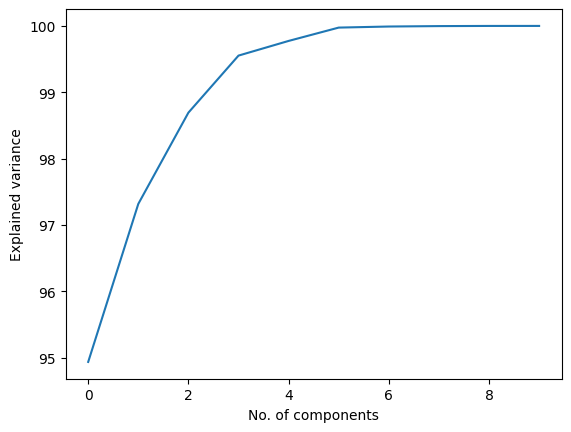

In [93]:
plt.plot(np.cumsum(pca_n.explained_variance_ratio_*100))
plt.xlabel('No. of components')
plt.ylabel('Explained variance')

In [94]:
pca_98=PCA(n_components=0.99,random_state=2020)

In [95]:
pca_98.fit(X)
X_pca_98=pca_98.transform(X)

In [96]:
X_new=pd.DataFrame(X_pca_98,columns=['PC1','PC2','PC3','PC4'])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [99]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 83.3333


In [100]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7375, 0.6930333817126271, 0.710410849621061, None)

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred1=clf.predict(X_test)

80.3030303030303


In [102]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred1, average='macro')

(0.6724137931034483, 0.6161103047895501, 0.631917631917632, None)

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)

In [104]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


77.27272727272727


In [105]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred8, average='macro')

(0.646978021978022, 0.6552975326560233, 0.6507936507936508, None)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.score(X_test, y_test)*100)

83.33333333333334


In [107]:
y_pred7 = knn.predict(X_test)

In [108]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred7, average='macro')

(0.7583333333333333, 0.634978229317852, 0.6618537494177923, None)

In [109]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
#fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred2=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

80.3030303030303


In [110]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred2, average='macro')

(0.65625, 0.5290275761973875, 0.5111111111111111, None)

In [111]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=100,dual=False)
logModel.fit(X_train, y_train,)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

84.84848484848484

In [112]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.7893462469733656, 0.6734397677793904, 0.7053571428571428, None)

In [113]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

83.33333333333334


In [114]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred1, average='macro')

(0.7376373626373627, 0.7510885341074021, 0.743915343915344, None)

In [115]:
classifier1=Sequential()

In [116]:
classifier1.add(Dense(units=3,activation='relu'))

In [117]:
classifier1.add(Dense(units=2,activation='relu'))

In [118]:

classifier1.add(Dense(units=2,activation='relu'))

In [119]:
## Adding the output layer
classifier1.add(Dense(units=1,activation='sigmoid'))

In [120]:

classifier1.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
#classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])
     

In [121]:
model_history=classifier1.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)
     

Epoch 1/1000
9/9 [==============================] - 1s 17ms/step - loss: 0.6913 - accuracy: 0.7045 - val_loss: 0.6884 - val_accuracy: 0.8182
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.7045 - val_loss: 0.6853 - val_accuracy: 0.8182
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.7045 - val_loss: 0.6821 - val_accuracy: 0.8182
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.7045 - val_loss: 0.6788 - val_accuracy: 0.8182
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.7045 - val_loss: 0.6753 - val_accuracy: 0.8182
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.7045 - val_loss: 0.6716 - val_accuracy: 0.8182
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6775 - accuracy: 0.7045 - val_loss: 0.6675 - val_accuracy: 0.8182
Epoch 8/1000
9/9 [=

9/9 [==============================] - 0s 6ms/step - loss: 0.5022 - accuracy: 0.7045 - val_loss: 0.4339 - val_accuracy: 0.8182
Epoch 60/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.7045 - val_loss: 0.4335 - val_accuracy: 0.8182
Epoch 61/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.4993 - accuracy: 0.7045 - val_loss: 0.4319 - val_accuracy: 0.8182
Epoch 62/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4982 - accuracy: 0.7045 - val_loss: 0.4313 - val_accuracy: 0.8182
Epoch 63/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4967 - accuracy: 0.7045 - val_loss: 0.4306 - val_accuracy: 0.8182
Epoch 64/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4957 - accuracy: 0.7045 - val_loss: 0.4312 - val_accuracy: 0.8182
Epoch 65/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4948 - accuracy: 0.7045 - val_loss: 0.4306 - val_accuracy: 0.8182
Epoch 66/1000
9/9 [========

In [122]:
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 2ms/step


In [123]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.803030303030303